In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.feature_selection import mutual_info_classif

In [ ]:
df=pd.read_csv("/content/Dataset.csv")
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE,comment
0,synthetic_1374,127.902454,140.434514,99.906118,0.019094781777163797,0.000148,0.011607,0.009835,0.034111,0.067042,...,0.169435,12.437801,1.010126,0.653562,0.680458,-3.883712,0.242680,2.666191,0.383812,NaN
1,phon_R01_S24_6,139.224000,586.567000,66.157000,0.03011,0.000220,0.018540,0.016280,0.055630,0.094190,...,0.259300,10.489000,1.000000,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774,NaN
2,synthetic_292,226.151149,236.605770,96.518580,0.0026247231126202424,0.000010,0.001530,0.001539,0.004538,0.019721,...,0.002989,26.556918,0.000000,0.458646,0.680707,-7.320679,0.085021,2.275521,0.096296,NaN
3,synthetic_1297,136.543313,159.301427,129.120296,0.00287592723195597,0.000020,0.001181,0.001473,0.003617,0.012595,...,0.005967,25.235832,0.993540,0.456385,0.622402,-6.589664,0.155396,2.068095,0.138603,NaN
4,synthetic_1536,139.802057,178.676266,79.043017,0.0039293629901695284,0.000030,0.001649,0.002071,0.004816,0.016006,...,0.010337,24.784478,1.004878,0.426897,0.680007,-5.658941,0.256272,2.478276,0.204146,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,synthetic_927,177.771095,235.900918,93.275619,0.004505258275126726,0.000029,0.002612,0.002533,0.007966,0.040595,...,0.028048,19.354673,0.000000,0.455510,0.660568,-6.391970,0.124134,2.724297,0.136194,NaN
2221,synthetic_328,243.226826,250.979860,234.693924,0.0027804987926707873,0.000010,0.001556,0.001745,0.004756,0.018205,...,0.006811,24.587722,0.000000,0.445780,0.631782,-6.661102,0.157013,2.238529,0.116021,NaN
2222,phon_R01_S32_2,120.078000,126.632000,105.667000,0.0027,0.000020,0.001160,0.001350,0.003490,0.010220,...,0.004870,26.369000,1.000000,0.491345,0.718839,-5.892061,0.195976,2.108873,0.183572,NaN
2223,synthetic_722,201.553505,214.639428,89.044966,0.007915597798242477,0.000040,0.004940,0.004486,0.014378,0.021758,...,0.013839,19.208263,0.000000,0.376534,0.708788,-5.712621,0.162558,2.841991,0.201864,NaN


In [ ]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE,comment
0,synthetic_1374,127.902454,140.434514,99.906118,0.019094781777163797,0.000148,0.011607,0.009835,0.034111,0.067042,...,0.169435,12.437801,1.010126,0.653562,0.680458,-3.883712,0.242680,2.666191,0.383812,NaN
1,phon_R01_S24_6,139.224000,586.567000,66.157000,0.03011,0.000220,0.018540,0.016280,0.055630,0.094190,...,0.259300,10.489000,1.000000,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774,NaN
2,synthetic_292,226.151149,236.605770,96.518580,0.0026247231126202424,0.000010,0.001530,0.001539,0.004538,0.019721,...,0.002989,26.556918,0.000000,0.458646,0.680707,-7.320679,0.085021,2.275521,0.096296,NaN
3,synthetic_1297,136.543313,159.301427,129.120296,0.00287592723195597,0.000020,0.001181,0.001473,0.003617,0.012595,...,0.005967,25.235832,0.993540,0.456385,0.622402,-6.589664,0.155396,2.068095,0.138603,NaN
4,synthetic_1536,139.802057,178.676266,79.043017,0.0039293629901695284,0.000030,0.001649,0.002071,0.004816,0.016006,...,0.010337,24.784478,1.004878,0.426897,0.680007,-5.658941,0.256272,2.478276,0.204146,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              2225 non-null   object 
 1   MDVP:Fo(Hz)       2152 non-null   float64
 2   MDVP:Fhi(Hz)      2151 non-null   float64
 3   MDVP:Flo(Hz)      2151 non-null   float64
 4   MDVP:Jitter(%)    2152 non-null   object 
 5   MDVP:Jitter(Abs)  2225 non-null   float64
 6   MDVP:RAP          2225 non-null   float64
 7   MDVP:PPQ          2225 non-null   float64
 8   Jitter:DDP        2225 non-null   float64
 9   MDVP:Shimmer      2225 non-null   float64
 10  MDVP:Shimmer(dB)  2225 non-null   float64
 11  Shimmer:APQ3      2225 non-null   float64
 12  Shimmer:APQ5      2225 non-null   float64
 13  MDVP:APQ          2225 non-null   float64
 14  Shimmer:DDA       2225 non-null   float64
 15  NHR               2225 non-null   float64
 16  HNR               2225 non-null   float64


In [ ]:
df.isnull().sum()

,0
name,0
MDVP:Fo(Hz),73
MDVP:Fhi(Hz),74
MDVP:Flo(Hz),74
MDVP:Jitter(%),73
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


In [ ]:
print(df['status'].value_counts())

status
0.000000    1063
1.000000     149
1.008112       2
0.998696       2
0.997456       2
            ... 
0.985692       1
0.988758       1
0.989565       1
1.017543       1
1.010315       1
Name: count, Length: 1002, dtype: int64


In [ ]:
df=df.drop(columns=['comment','name'])

In [ ]:
df.dropna()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,127.902454,140.434514,99.906118,0.019094781777163797,0.000148,0.011607,0.009835,0.034111,0.067042,0.641673,...,0.109209,0.169435,12.437801,1.010126,0.653562,0.680458,-3.883712,0.242680,2.666191,0.383812
1,139.224000,586.567000,66.157000,0.03011,0.000220,0.018540,0.016280,0.055630,0.094190,0.930000,...,0.166540,0.259300,10.489000,1.000000,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
2,226.151149,236.605770,96.518580,0.0026247231126202424,0.000010,0.001530,0.001539,0.004538,0.019721,0.160627,...,0.030092,0.002989,26.556918,0.000000,0.458646,0.680707,-7.320679,0.085021,2.275521,0.096296
3,136.543313,159.301427,129.120296,0.00287592723195597,0.000020,0.001181,0.001473,0.003617,0.012595,0.109614,...,0.020299,0.005967,25.235832,0.993540,0.456385,0.622402,-6.589664,0.155396,2.068095,0.138603
4,139.802057,178.676266,79.043017,0.0039293629901695284,0.000030,0.001649,0.002071,0.004816,0.016006,0.154551,...,0.021881,0.010337,24.784478,1.004878,0.426897,0.680007,-5.658941,0.256272,2.478276,0.204146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,177.771095,235.900918,93.275619,0.004505258275126726,0.000029,0.002612,0.002533,0.007966,0.040595,0.403158,...,0.072444,0.028048,19.354673,0.000000,0.455510,0.660568,-6.391970,0.124134,2.724297,0.136194
2221,243.226826,250.979860,234.693924,0.0027804987926707873,0.000010,0.001556,0.001745,0.004756,0.018205,0.153024,...,0.030424,0.006811,24.587722,0.000000,0.445780,0.631782,-6.661102,0.157013,2.238529,0.116021
2222,120.078000,126.632000,105.667000,0.0027,0.000020,0.001160,0.001350,0.003490,0.010220,0.090000,...,0.014280,0.004870,26.369000,1.000000,0.491345,0.718839,-5.892061,0.195976,2.108873,0.183572
2223,201.553505,214.639428,89.044966,0.007915597798242477,0.000040,0.004940,0.004486,0.014378,0.021758,0.184678,...,0.038568,0.013839,19.208263,0.000000,0.376534,0.708788,-5.712621,0.162558,2.841991,0.201864


In [ ]:
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,127.902454,140.434514,99.906118,0.019094781777163797,0.000148,0.011607,0.009835,0.034111,0.067042,0.641673,...,0.109209,0.169435,12.437801,1.010126,0.653562,0.680458,-3.883712,0.242680,2.666191,0.383812
1,139.224000,586.567000,66.157000,0.03011,0.000220,0.018540,0.016280,0.055630,0.094190,0.930000,...,0.166540,0.259300,10.489000,1.000000,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
2,226.151149,236.605770,96.518580,0.0026247231126202424,0.000010,0.001530,0.001539,0.004538,0.019721,0.160627,...,0.030092,0.002989,26.556918,0.000000,0.458646,0.680707,-7.320679,0.085021,2.275521,0.096296
3,136.543313,159.301427,129.120296,0.00287592723195597,0.000020,0.001181,0.001473,0.003617,0.012595,0.109614,...,0.020299,0.005967,25.235832,0.993540,0.456385,0.622402,-6.589664,0.155396,2.068095,0.138603
4,139.802057,178.676266,79.043017,0.0039293629901695284,0.000030,0.001649,0.002071,0.004816,0.016006,0.154551,...,0.021881,0.010337,24.784478,1.004878,0.426897,0.680007,-5.658941,0.256272,2.478276,0.204146


In [ ]:
df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,127.902454,140.434514,99.906118,0.019094781777163797,0.000148,0.011607,0.009835,0.034111,0.067042,0.641673,...,0.109209,0.169435,12.437801,1.010126,0.653562,0.680458,-3.883712,0.242680,2.666191,0.383812
1,139.224000,586.567000,66.157000,0.03011,0.000220,0.018540,0.016280,0.055630,0.094190,0.930000,...,0.166540,0.259300,10.489000,1.000000,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
2,226.151149,236.605770,96.518580,0.0026247231126202424,0.000010,0.001530,0.001539,0.004538,0.019721,0.160627,...,0.030092,0.002989,26.556918,0.000000,0.458646,0.680707,-7.320679,0.085021,2.275521,0.096296
3,136.543313,159.301427,129.120296,0.00287592723195597,0.000020,0.001181,0.001473,0.003617,0.012595,0.109614,...,0.020299,0.005967,25.235832,0.993540,0.456385,0.622402,-6.589664,0.155396,2.068095,0.138603
4,139.802057,178.676266,79.043017,0.0039293629901695284,0.000030,0.001649,0.002071,0.004816,0.016006,0.154551,...,0.021881,0.010337,24.784478,1.004878,0.426897,0.680007,-5.658941,0.256272,2.478276,0.204146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,177.771095,235.900918,93.275619,0.004505258275126726,0.000029,0.002612,0.002533,0.007966,0.040595,0.403158,...,0.072444,0.028048,19.354673,0.000000,0.455510,0.660568,-6.391970,0.124134,2.724297,0.136194
2221,243.226826,250.979860,234.693924,0.0027804987926707873,0.000010,0.001556,0.001745,0.004756,0.018205,0.153024,...,0.030424,0.006811,24.587722,0.000000,0.445780,0.631782,-6.661102,0.157013,2.238529,0.116021
2222,120.078000,126.632000,105.667000,0.0027,0.000020,0.001160,0.001350,0.003490,0.010220,0.090000,...,0.014280,0.004870,26.369000,1.000000,0.491345,0.718839,-5.892061,0.195976,2.108873,0.183572
2223,201.553505,214.639428,89.044966,0.007915597798242477,0.000040,0.004940,0.004486,0.014378,0.021758,0.184678,...,0.038568,0.013839,19.208263,0.000000,0.376534,0.708788,-5.712621,0.162558,2.841991,0.201864


In [ ]:
df = df[pd.to_numeric(df['MDVP:Jitter(%)'], errors='coerce').notnull()]
df['MDVP:Jitter(%)'] = df['MDVP:Jitter(%)'].astype(float)

/tmp/ipython-input-110-89858950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MDVP:Jitter(%)'] = df['MDVP:Jitter(%)'].astype(float)


In [ ]:
df = df.drop_duplicates().reset_index(drop=True)

In [ ]:
df['status'] = df['status'].apply(lambda x: 1 if x >= 0.5 else 0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2147 entries, 0 to 2146
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       2147 non-null   float64
 1   MDVP:Fhi(Hz)      2147 non-null   float64
 2   MDVP:Flo(Hz)      2147 non-null   float64
 3   MDVP:Jitter(%)    2147 non-null   float64
 4   MDVP:Jitter(Abs)  2147 non-null   float64
 5   MDVP:RAP          2147 non-null   float64
 6   MDVP:PPQ          2147 non-null   float64
 7   Jitter:DDP        2147 non-null   float64
 8   MDVP:Shimmer      2147 non-null   float64
 9   MDVP:Shimmer(dB)  2147 non-null   float64
 10  Shimmer:APQ3      2147 non-null   float64
 11  Shimmer:APQ5      2147 non-null   float64
 12  MDVP:APQ          2147 non-null   float64
 13  Shimmer:DDA       2147 non-null   float64
 14  NHR               2147 non-null   float64
 15  HNR               2147 non-null   float64
 16  status            2147 non-null   int64  


In [ ]:
print("After Clean: ",df.shape)
print(df['status'].value_counts())

After Clean:  (2147, 23)
status
1    1120
0    1027
Name: count, dtype: int64


/tmp/ipython-input-115-3283823040.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='status', data=df, palette='Set2')


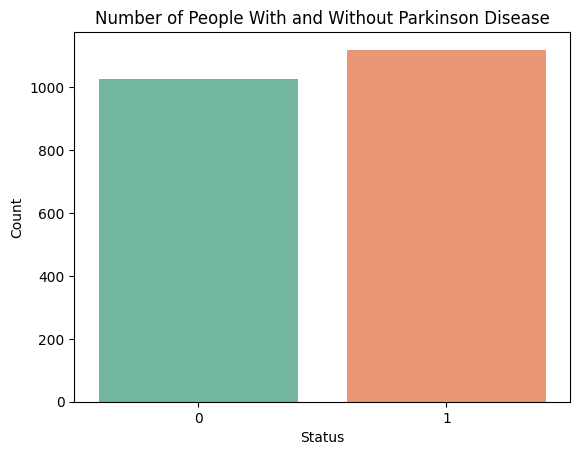

In [ ]:
sns.countplot(x='status', data=df, palette='Set2')
plt.title('Number of People With and Without Parkinson Disease')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

In [ ]:
X = df.drop(columns=['status'])
Y = df['status']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2147 entries, 0 to 2146
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       2147 non-null   float64
 1   MDVP:Fhi(Hz)      2147 non-null   float64
 2   MDVP:Flo(Hz)      2147 non-null   float64
 3   MDVP:Jitter(%)    2147 non-null   float64
 4   MDVP:Jitter(Abs)  2147 non-null   float64
 5   MDVP:RAP          2147 non-null   float64
 6   MDVP:PPQ          2147 non-null   float64
 7   Jitter:DDP        2147 non-null   float64
 8   MDVP:Shimmer      2147 non-null   float64
 9   MDVP:Shimmer(dB)  2147 non-null   float64
 10  Shimmer:APQ3      2147 non-null   float64
 11  Shimmer:APQ5      2147 non-null   float64
 12  MDVP:APQ          2147 non-null   float64
 13  Shimmer:DDA       2147 non-null   float64
 14  NHR               2147 non-null   float64
 15  HNR               2147 non-null   float64
 16  status            2147 non-null   int64  


In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_selected = selector.fit_transform(X, Y)
selected_features = X.columns[selector.get_support()]
X = df[selected_features]

print("Selected Features:", selected_features.tolist())


Selected Features: ['MDVP:Fo(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'Jitter:DDP', 'MDVP:APQ', 'NHR', 'spread1', 'spread2', 'PPE']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, test_size=0.2, random_state=42)

/tmp/ipython-input-119-1026928551.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_scores, y=mi_scores.index, palette='Blues_r')


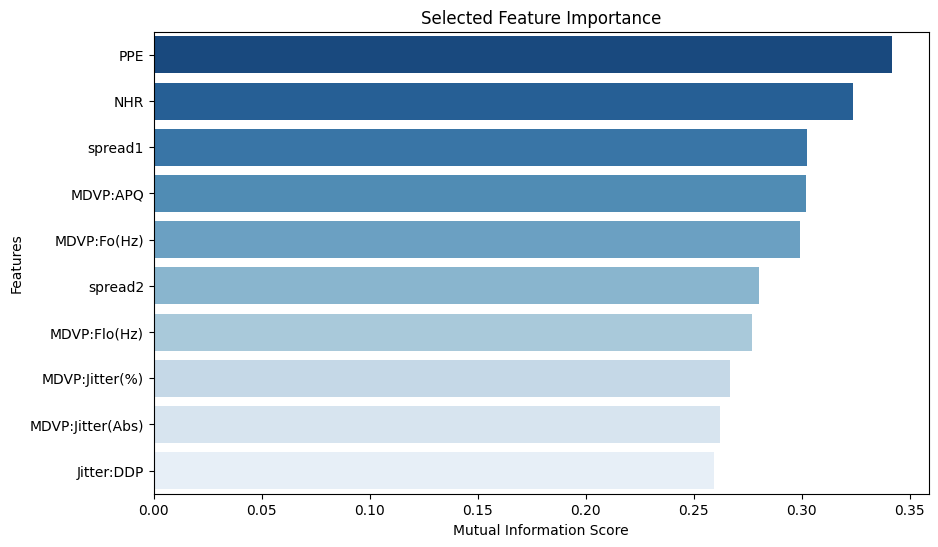

In [ ]:
mi_scores = mutual_info_classif(X, Y)
mi_scores = pd.Series(mi_scores, index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=mi_scores, y=mi_scores.index, palette='Blues_r')
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
plt.title('Selected Feature Importance')
plt.show()

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
svm_default = SVC()
svm_default.fit(X_train, y_train)
y_pred_default = svm_default.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)
print(f"Default SVM Test Accuracy: {accuracy_default * 100:.2f}%")
print(classification_report(y_test, preds))

Default SVM Test Accuracy: 95.81%
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       206
           1       0.86      0.85      0.85       224

    accuracy                           0.85       430
   macro avg       0.85      0.85      0.85       430
weighted avg       0.85      0.85      0.85       430



In [ ]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_svm = GridSearchCV(SVC(), param_grid, cv=5)
grid_svm.fit(X_train, y_train)

best_svm = grid_svm.best_estimator_

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
models = {
    'Tuned SVM': best_svm,
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"\n{name} Accuracy: {acc*100:.2f}%")
    print(classification_report(y_test, preds))


Tuned SVM Accuracy: 98.14%
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       206
           1       0.99      0.97      0.98       224

    accuracy                           0.98       430
   macro avg       0.98      0.98      0.98       430
weighted avg       0.98      0.98      0.98       430


Logistic Regression Accuracy: 84.88%
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       206
           1       0.86      0.85      0.85       224

    accuracy                           0.85       430
   macro avg       0.85      0.85      0.85       430
weighted avg       0.85      0.85      0.85       430



In [ ]:
best_svm.fit(X_train, y_train)
print(f"Tuned SVM Train Accuracy: {best_svm.score(X_train, y_train) * 100:.2f}%")
print(f"Tuned SVM Test Accuracy: {best_svm.score(X_test, y_test) * 100:.2f}%")

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
print(f"Logistic Regression Train Accuracy: {log_reg.score(X_train, y_train) * 100:.2f}%")
print(f"Logistic Regression Test Accuracy: {log_reg.score(X_test, y_test) * 100:.2f}%")

Tuned SVM Train Accuracy: 98.19%
Tuned SVM Test Accuracy: 98.14%
Logistic Regression Train Accuracy: 84.97%
Logistic Regression Test Accuracy: 84.88%


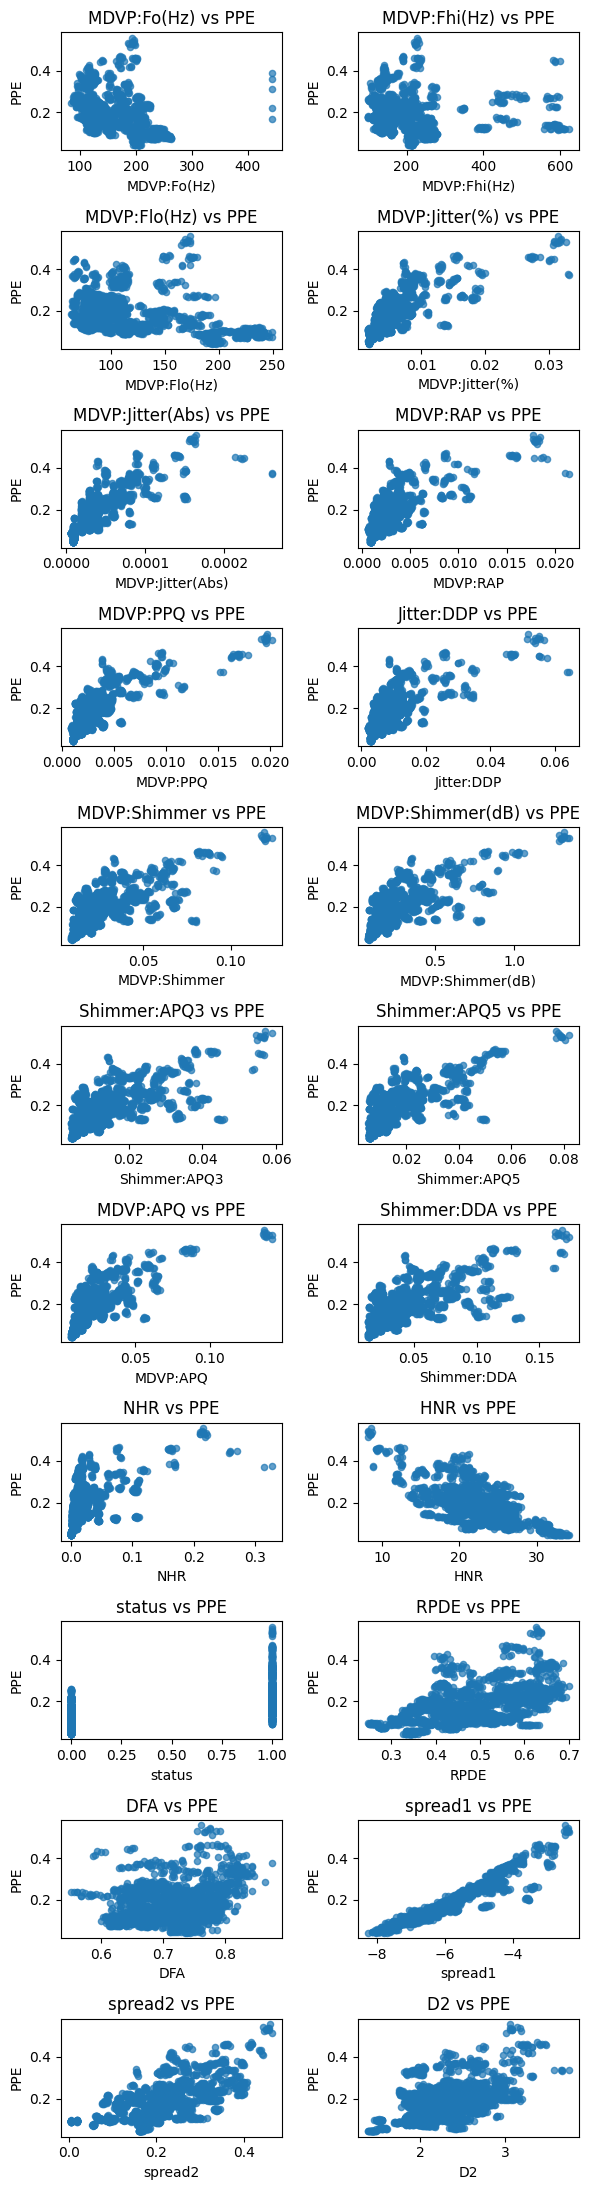

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
target_col = numeric_cols[-1]

num_plots = len(numeric_cols) - 1
cols = 2
rows = (num_plots + 1) // cols

fig, axs = plt.subplots(rows, cols, figsize=(6, rows * 2))
axs = axs.flatten()

plot_idx = 0
for col in numeric_cols:
    if col == target_col:
        continue
    axs[plot_idx].scatter(df[col], df[target_col], alpha=0.7,s=20)
    axs[plot_idx].set_title(f"{col} vs {target_col}")
    axs[plot_idx].set_xlabel(col)
    axs[plot_idx].set_ylabel(target_col)
    plot_idx += 1

for i in range(plot_idx, len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()


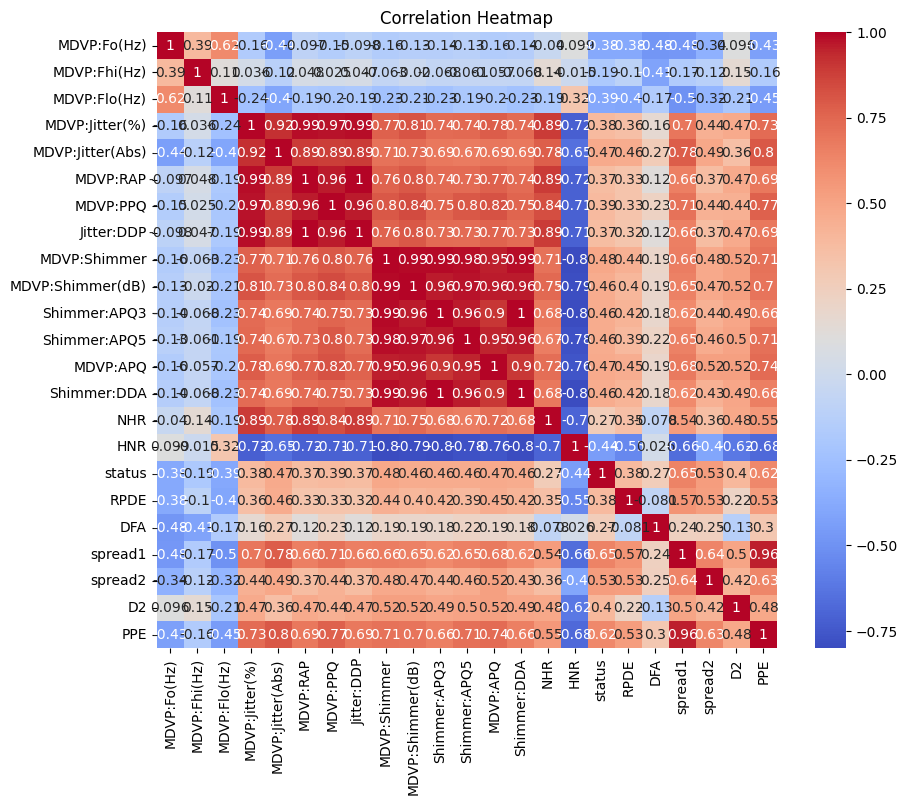

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

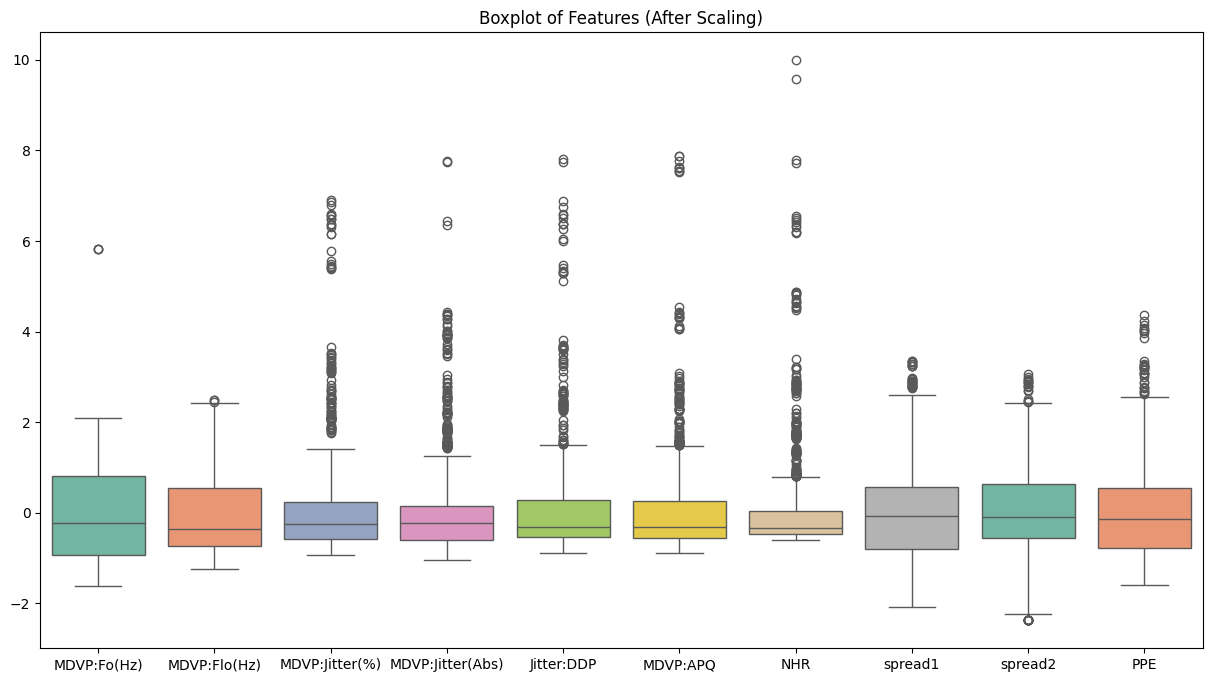

In [ ]:
scaled_df = pd.DataFrame(X_train, columns=X.columns)

plt.figure(figsize=(15, 8))
sns.boxplot(data=scaled_df, palette='Set2')
plt.title('Boxplot of Features (After Scaling)')
plt.show()

In [ ]:
y_pred = best_svm.predict(X_test)

<Figure size 600x400 with 0 Axes>

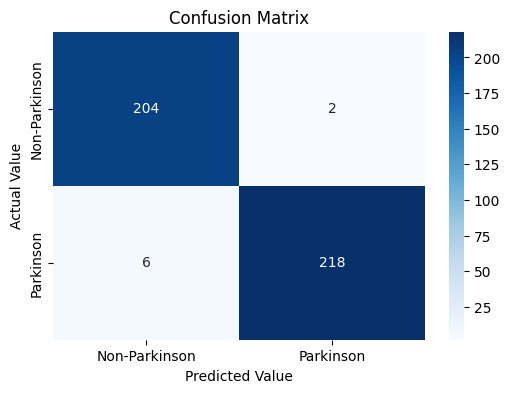

In [ ]:
a= confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.figure(figsize=(6,4))
sns.heatmap(a, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Parkinson', 'Parkinson'], yticklabels=['Non-Parkinson', 'Parkinson'])
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
joblib.dump(best_svm, "model.joblib")
joblib.dump(scaler, "scaler.joblib")

['scaler.joblib']